# Speech Emotion Recognition – Preprocessing
## Notebook 2: Handling Missing Values

**Registration Number:** IT24102798  
**Task:** Detect and handle Missing Values in the Dataset.  
**Objective:** Ensure the Dataset is clean and contains no Null or Invalid Values before Training.

### Step 1: Importing Libraries and Data Arrays
First, we need to import the necessary Libraries and Data Arrays of Extracted Features.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = np.load("../results/features_and_labels/X_features.npy", allow_pickle=False)
y = np.load("../results/features_and_labels/y_labels.npy", allow_pickle=True)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (2870, 116)
Labels shape: (2870,)


### Step 2: Convert Features into a DataFrame
We will put the features into a `pandas` DataFrame so that we can easily check for missing values.

In [9]:
df = pd.DataFrame(X)
df["emotion"] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,emotion
0,-469.677063,33.594616,4.975258,8.371067,1.992480,-4.194683,-2.305305,-3.754504,-2.330569,4.608140,...,0.445539,0.191169,0.231488,0.221131,0.340141,0.170471,0.279709,0.381629,0.199950,neutral
1,-459.840088,33.337284,3.588513,10.999732,0.765450,-3.593445,-2.849192,-5.310829,-1.954750,4.414882,...,0.454025,0.193513,0.230735,0.219533,0.324711,0.168356,0.282292,0.410520,0.188443,neutral
2,-460.854553,35.502811,4.278590,8.724514,-0.171948,-2.784281,-3.759825,-4.420269,-3.023970,3.874425,...,0.460651,0.186819,0.225535,0.214604,0.338257,0.162786,0.264915,0.380400,0.208246,neutral
3,-455.989563,35.595882,5.115926,9.091783,0.802329,-1.342748,-3.980319,-4.840831,-1.725044,5.335970,...,0.476619,0.193392,0.240152,0.209993,0.328946,0.155799,0.264079,0.399235,0.209314,neutral
4,-484.466675,36.726303,6.566588,8.952496,1.008656,-3.470678,-4.511901,-3.212588,-4.341210,3.822065,...,0.440573,0.187168,0.231194,0.202355,0.320247,0.151997,0.260596,0.402678,0.173798,calm


### Step 3: Check for Missing Values
We use `.isnull().sum()` to check if there are any `NaN` values.

In [3]:
missing_counts = df.isnull().sum()
print(missing_counts.head(115))
print("Total missing values:", missing_counts.sum())

0      0
1      0
2      0
3      0
4      0
      ..
110    0
111    0
112    0
113    0
114    0
Length: 115, dtype: int64
Total missing values: 0


### Step 4: Visualize Missing Values
A heatmap is a good way to see where missing values occur.

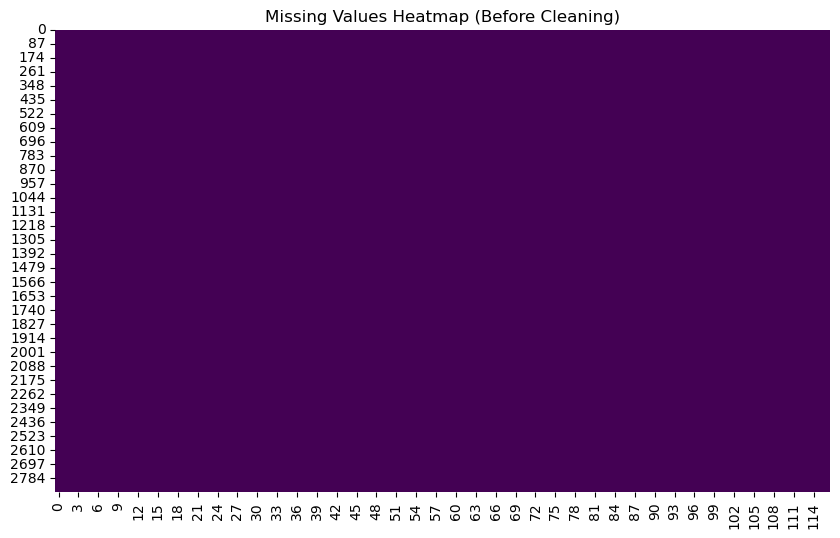

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Before Cleaning)")
plt.show()

### Step 5: Handle Missing Values
Since audio features are numeric, we cannot leave missing values.  
We have two main options:  
1. Replace with **mean/median** of that feature.  
2. Drop rows with missing values (only if very few).  

Here, we will replace missing values with the **mean** of each column.

In [10]:
features = df.drop(columns=["emotion"])
df[features.columns].fillna(df[features.columns].mean(), inplace=True)

print("Total missing values after cleaning:", df.isnull().sum().sum())

Total missing values after cleaning: 0


C:\Users\MSI\AppData\Local\Temp\ipykernel_3548\2492573438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features.columns].fillna(df[features.columns].mean(), inplace=True)


### Step 6: Visualize Again (After Cleaning)

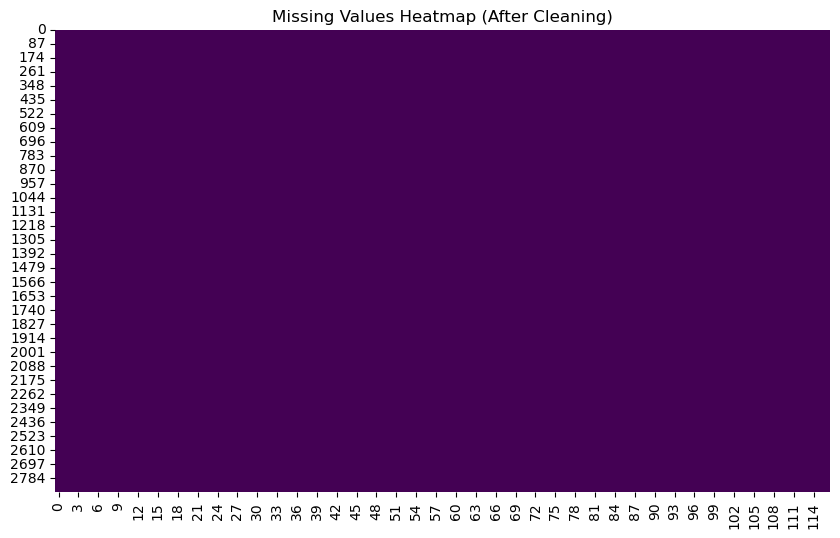

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (After Cleaning)")
plt.show()

# ✅ Conclusion
- We checked for missing values in the feature dataset.  
- Found `0` of missing entries as RAVDESS is a Audio Dataset and features are extracted by these audio files in real time.  
- Replaced them with column means (But actually there's no need of doing this but added for demonstration).  
- Now the dataset is clean and ready for the next preprocessing step.